In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats

In [3]:
df = pd.read_csv('/Users/jacksonsorenson/Documents/Pyhton Projects/Valentines Day/archive (13)/gifts_age.csv')

df2 = pd.read_csv('/Users/jacksonsorenson/Documents/Pyhton Projects/Valentines Day/archive (13)/gifts_gender.csv')

df3 = pd.read_csv('/Users/jacksonsorenson/Documents/Pyhton Projects/Valentines Day/archive (13)/historical_spending.csv')

In [4]:
# Check the column names for each DataFrame
print("Columns in df (gifts_age.csv):")
print(df.columns)
print("\nShape:", df.shape)

print("\nColumns in df2 (gifts_gender.csv):")
print(df2.columns)
print("\nShape:", df2.shape)

print("\nColumns in df3 (historical_spending.csv):")
print(df3.columns)
print("\nShape:", df3.shape)


Columns in df (gifts_age.csv):
Index(['Age', 'SpendingCelebrating', 'Candy', 'Flowers', 'Jewelry',
       'GreetingCards', 'EveningOut', 'Clothing', 'GiftCards'],
      dtype='object')

Shape: (6, 9)

Columns in df2 (gifts_gender.csv):
Index(['Gender', 'SpendingCelebrating', 'Candy', 'Flowers', 'Jewelry',
       'GreetingCards', 'EveningOut', 'Clothing', 'GiftCards'],
      dtype='object')

Shape: (2, 9)

Columns in df3 (historical_spending.csv):
Index(['Year', 'PercentCelebrating', 'PerPerson', 'Candy', 'Flowers',
       'Jewelry', 'GreetingCards', 'EveningOut', 'Clothing', 'GiftCards'],
      dtype='object')

Shape: (13, 10)


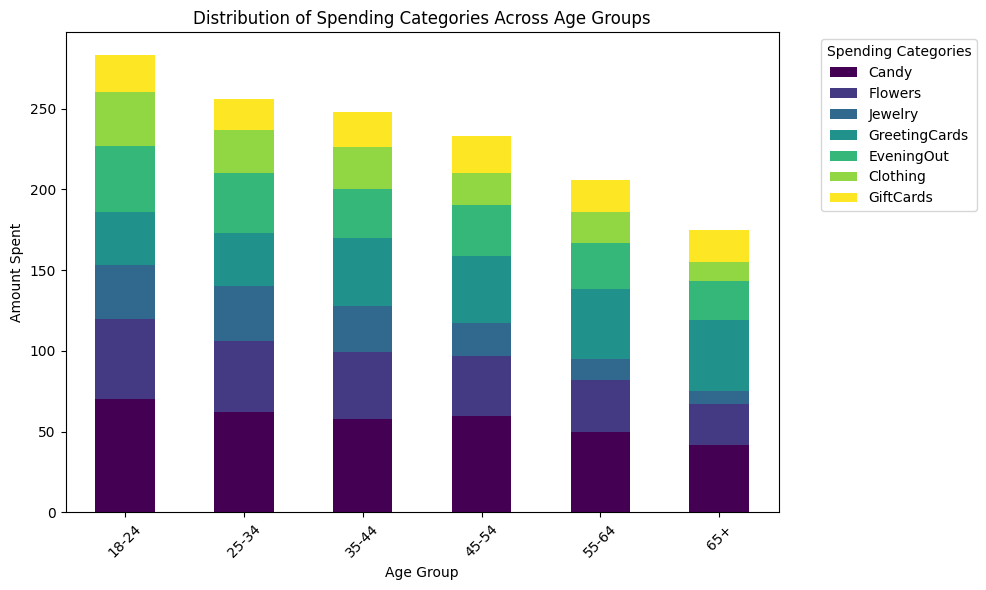

In [14]:
# Drop 'SpendingCelebrating' before plotting
df_filtered = df.drop(columns=['SpendingCelebrating'])

# Convert Age column to categorical for better visualization
df_filtered['Age'] = df_filtered['Age'].astype(str)

# Plot stacked bar chart for spending categories per Age group
df_filtered.set_index('Age').plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title("Distribution of Spending Categories Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Amount Spent")
plt.legend(title="Spending Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


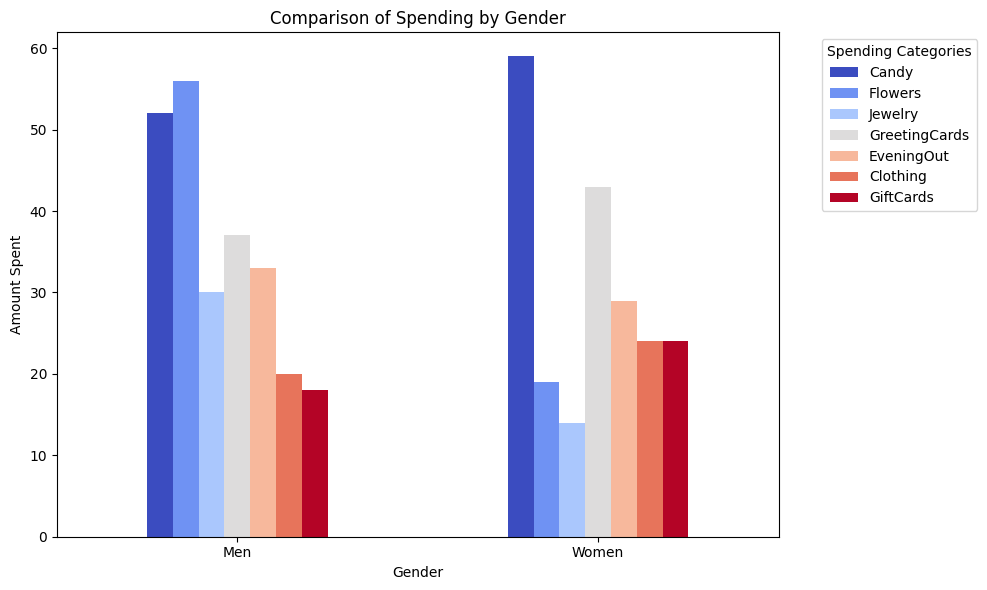

In [13]:

# Drop 'SpendingCelebrating' column before plotting
df2_filtered = df2.drop(columns=['SpendingCelebrating'])

# Plot the updated data
df2_filtered.set_index("Gender", inplace=False).plot(kind='bar', figsize=(10, 6), colormap='coolwarm')

plt.title("Comparison of Spending by Gender")
plt.xlabel("Gender")
plt.ylabel("Amount Spent")
plt.xticks(rotation=0)
plt.legend(title="Spending Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


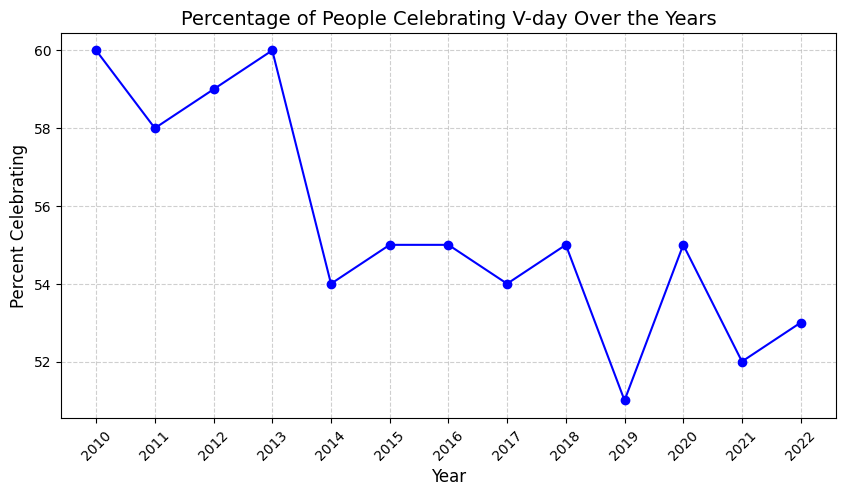

In [12]:

# Convert Year to an integer 
df3['Year'] = df3['Year'].astype(int)
df3['PercentCelebrating'] = df3['PercentCelebrating'].astype(float)

# Plot Percent Celebrating by Year
plt.figure(figsize=(10, 5))
plt.plot(df3['Year'], df3['PercentCelebrating'], marker='o', linestyle='-', color='b')

# Improve readability
plt.title("Percentage of People Celebrating V-day Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percent Celebrating", fontsize=12)
plt.xticks(df3['Year'], rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


In [16]:
# Fit a linear regression model
X = df3['Year']
y = df3['PerPerson']
X = sm.add_constant(X)  # Adds intercept

model = sm.OLS(y, X).fit()
print(model.summary())  # Print regression results

                            OLS Regression Results                            
Dep. Variable:              PerPerson   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     50.48
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           1.98e-05
Time:                        21:33:27   Log-Likelihood:                -48.662
No. Observations:                  13   AIC:                             101.3
Df Residuals:                      11   BIC:                             102.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.165e+04   1660.134     -7.018      0.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)
